
# Caso de analisis

Se desea contrastar los topicos: Consumo de licores (Cerveza y vino) contra el nivel de felicidad de los ciudadanos de diferentes sitios, esto con el proposito de estimar el nivel de felicidad de una población con base en este indice, para ello se dispone de un data set de información que recopila el consumo de licor y el nivel de felicidad de una serie de paises. Se expresará esta información mediante el uso de regresiones linales

In [159]:
# Librerias a usar

# Tratamiento de los datos numpy
# Graficas matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [160]:
# Se carga el data set de kaggle para leerlo
# https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption
# --------------------------------------------------------------

data_set = np.genfromtxt('HappinessAlcoholConsumption.csv', delimiter=',')

print(data_set[:10])
print(data_set.shape)

[[    nan     nan     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan   7.526 928.     53.579 224.     81.    278.   ]
 [    nan     nan     nan   7.509 943.     79.866 185.    100.    280.   ]
 [    nan     nan     nan   7.501 933.     60.53  233.     61.     78.   ]
 [    nan     nan     nan   7.498 951.     70.89  169.     71.    129.   ]
 [    nan     nan     nan   7.413 918.     43.433 263.    133.     97.   ]
 [    nan     nan     nan   7.404 922.     42.349 240.    122.    100.   ]
 [    nan     nan     nan   7.339 928.     45.638 251.     88.    190.   ]
 [    nan     nan     nan   7.334 915.     40.332 203.     79.    175.   ]
 [    nan     nan     nan   7.313 938.     49.897 261.     72.    212.   ]]
(123, 9)


In [161]:
# Se separa la información en 2 tipos de licores, cerveza y vino
# además del invel de felicidad
# --------------------------------------------------------------

x_beer = data_set[:,6]
x_wine = data_set[:,8]
y_happiness = data_set[:,3]

# Se muestran los valores en x, y
# --------------------------------------------------------------
print(x_beer, '\n')
print(x_wine, '\n')
print(y_happiness, '\n')

[ nan 224. 185. 233. 169. 263. 240. 251. 203. 261. 152.  63. 279. 249.
 149. 346. 245. 295. 313. 236. 238.  60. 219. 130. 285. 193. 361.  16.
 115. 149. 159. 127.  99.   1. 284.  53. 128.  42. 197. 333. 196.  52.
  78.  25.  85. 162. 263.  77. 124. 109. 247. 343. 140. 167. 343. 142.
 270. 163.  19.  98. 281. 192. 213. 297. 224.  82. 230.  51.   6.  21.
  71.  79.  31. 283.  76.  31. 193.  12. 234.  20. 194. 106. 111.  51.
 133.  77.  42.  69.  32.  89.  25. 376. 147. 225.   6.  21.  58. 206.
  31.  32.  52.  76.   9. 231.  64.   8. 347.   5.   1. 173.   1.  37.
  57. 217.   3.  15.  25.  26.  36.  19.  34.  36.   5.] 

[ nan 278. 280.  78. 129.  97. 100. 190. 175. 212. 186.   9. 191.  84.
  11. 175.  16. 212. 165. 271.   5.  11. 195. 172.  18. 221. 134.   5.
 220. 120.   3. 370.   1.   7. 112.   2.   7.   7.   7.   3. 116.   2.
   1.   8. 237.   3.   8.  16.  12.  18.  73.  56.   9.   8.  56.  42.
 276.  21.  32.  18.  62. 113.  74. 167.  59.   9. 254.   7.   1.   5.
   1.   8.   6. 12

In [162]:
# Verificación de los datos generados
# --------------------------------------------------------------

# Dimensión de los vectores x, y
# --------------------------------------------------------------
print("Dimension de los vectores")
print(y_happiness.ndim, '\n')
print(x_beer.ndim, '\n')
print(x_wine.ndim, '\n')

# Elementos contenidos en los vectores x, y
# --------------------------------------------------------------
print("Contenidos de los vectores")
print(y_happiness.shape, '\n')
print(x_beer.shape, '\n')
print(x_wine.shape, '\n')

Dimension de los vectores
1 

1 

1 

Contenidos de los vectores
(123,) 

(123,) 

(123,) 



In [163]:
# Investigamos el número de valores, tipo nan, que contiene el vector
# --------------------------------------------------------------
print(np.sum(np.isnan(y_happiness)))

1


In [164]:
# Número de elementos en x, y, antes de ser comprimidos
# --------------------------------------------------------------
print("Antes de limpiar al data set", '\n')
print(x_beer.shape, '\n')
print(x_wine.shape, '\n')
print(y_happiness.shape, '\n')

# Se eliminan los elementos tipo nan, tanto de x como de y
# --------------------------------------------------------------
x_beer = x_beer[~np.isnan(y_happiness)]
x_wine = x_wine[~np.isnan(y_happiness)]
y_happiness = y_happiness[~np.isnan(y_happiness)]

# Se cuenta el número de elementos que quedan, tanto de x como de y
# --------------------------------------------------------------
print("Despues de limpiar al data set", '\n')
print(x_beer.shape, '\n')
print(x_wine.shape, '\n')
print(y_happiness.shape, '\n')

Antes de limpiar al data set 

(123,) 

(123,) 

(123,) 

Despues de limpiar al data set 

(122,) 

(122,) 

(122,) 



## Nube de datos

Graficaremos los datos que tenemos usando matplotlib para ver la dispersion de puntos segun el respectivo tipo de licor

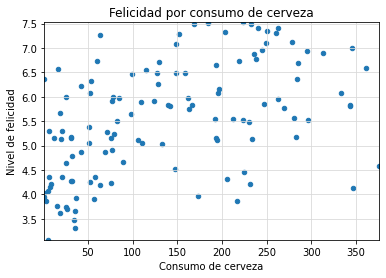

In [165]:
plt.scatter(x_beer, y_happiness, s=20)

# Títulos del gráfico (Cerveza)
# --------------------------------------------------------------
plt.title("Felicidad por consumo de cerveza (Por persona)")
plt.xlabel("Consumo de cerveza")
plt.ylabel("Nivel de felicidad")

# Otras opciones gráficas (Cerveza)
# --------------------------------------------------------------
plt.grid(True, linestyle='-', color='0.85')
plt.autoscale(tight=True)

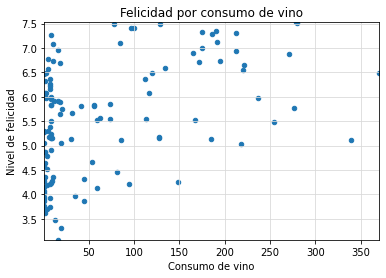

In [166]:
plt.scatter(x_wine, y_happiness, s=20)

# Títulos del gráfico (Vino)
# --------------------------------------------------------------
plt.title("Felicidad por consumo de vino (Por persona)")
plt.xlabel("Consumo de vino")
plt.ylabel("Nivel de felicidad")

# Otras opciones gráficas (Vino)
# --------------------------------------------------------------
plt.grid(True, linestyle='-', color='0.85')
plt.autoscale(tight=True)

## Expresión matematica

Para expresar lo que deseamos saber de las nubes de puntos es necesario analizar matematicamente lo que se ha escrito, con este proposito expresaremos a forma de regresión lineal las 2 nubes de puntos anteriores, tomando los vectores que las conforman como insumo para la generacion de las respectivas funciones polinomiales que se ajustan a los modelos

In [167]:
# Función del calculo del error
# --------------------------------------------------------------

def error(f, x, y):
    return np.sum((f(x)-y)**2)

#####Nota:

Por facilidad se usará 1 sola grafica de cada dispersión de puntos para expresar las respectivas graficas polinomiales

Error después de generar la recta de grado 1: 120.80524311054384 

Error después de generar la recta de grado 2: 107.46603221083429 

Error después de generar la recta de grado 3: 107.42859987050622 

Error después de generar la recta de grado 4: 106.86693260389464 

Error después de generar la recta de grado 5: 105.0630050993755 



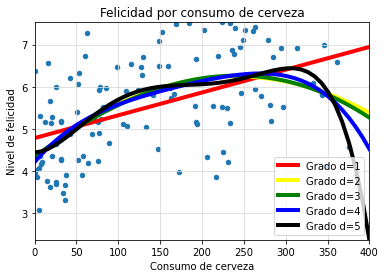

In [173]:
plt.scatter(x_beer, y_happiness, s=20)

# Títulos del gráfico (Cerveza)
# --------------------------------------------------------------
plt.title("Felicidad por consumo de cerveza (Por persona)")
plt.xlabel("Consumo de cerveza")
plt.ylabel("Nivel de felicidad")

# Otras opciones gráficas (Cerveza)
# --------------------------------------------------------------
plt.grid(True, linestyle='-', color='0.85')
plt.autoscale(tight=True)

# Calculos de polinomos de grado 1 a 5
# --------------------------------------------------------------

f1p, residuals, rank, sv, rcond = np.polyfit(x_beer, y_happiness, 1, full=True)
f1 = np.poly1d(f1p)
fx = np.linspace(0, 400)
plt.plot(fx, f1(fx), linewidth=4, color="red")
print("Error después de generar la recta de grado %i:" % f1.order,
      error(f1, x_beer, y_happiness), '\n')

f2p = np.polyfit(x_beer, y_happiness, 2)
f2 = np.poly1d(f2p)
plt.plot(fx, f2(fx), linewidth=4, color="yellow")
print("Error después de generar la recta de grado %i:" % f2.order,
      error(f2, x_beer, y_happiness), '\n')

f3p = np.polyfit(x_beer, y_happiness, 3)
f3 = np.poly1d(f3p)
plt.plot(fx, f3(fx), linewidth=4, color="green")
print("Error después de generar la recta de grado %i:" % f3.order,
      error(f3, x_beer, y_happiness), '\n')

f4p = np.polyfit(x_beer, y_happiness, 4)
f4= np.poly1d(f4p)
plt.plot(fx, f4(fx), linewidth=4, color="blue")
print("Error después de generar la recta de grado %i:" % f4.order,
      error(f4, x_beer, y_happiness), '\n')

f5p = np.polyfit(x_beer, y_happiness, 5)
f5= np.poly1d(f5p)
plt.plot(fx, f5(fx), linewidth=4, color="black")
print("Error después de generar la recta de grado %i:" % f5.order,
      error(f5, x_beer, y_happiness), '\n')

plt.legend(["Grado d=%i" % f1.order, "Grado d=%i" % f2.order, 
            "Grado d=%i" % f3.order, "Grado d=%i" % f4.order,
            "Grado d=%i" % f5.order], loc="lower right")

Error después de generar la recta de grado 1: 127.25292760630127 

Error después de generar la recta de grado 2: 122.52744584829664 

Error después de generar la recta de grado 3: 122.24168319492115 

Error después de generar la recta de grado 4: 122.07811154176528 

Error después de generar la recta de grado 5: 121.56608767980131 



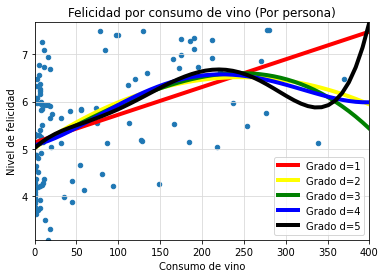

In [177]:
plt.scatter(x_wine, y_happiness, s=20)

# Títulos del gráfico (Vino)
# --------------------------------------------------------------
plt.title("Felicidad por consumo de vino (Por persona)")
plt.xlabel("Consumo de vino")
plt.ylabel("Nivel de felicidad")

# Otras opciones gráficas (Vino)
# --------------------------------------------------------------
plt.grid(True, linestyle='-', color='0.85')
plt.autoscale(tight=True)

# Calculos de polinomos de grado 1 a 5
# --------------------------------------------------------------

f1p, residuals, rank, sv, rcond = np.polyfit(x_wine, y_happiness, 1, full=True)
f1 = np.poly1d(f1p)
fx = np.linspace(0, 400)
plt.plot(fx, f1(fx), linewidth=4, color="red")
print("Error después de generar la recta de grado %i:" % f1.order,
      error(f1, x_wine, y_happiness), '\n')

f2p = np.polyfit(x_wine, y_happiness, 2)
f2 = np.poly1d(f2p)
plt.plot(fx, f2(fx), linewidth=4, color="yellow")
print("Error después de generar la recta de grado %i:" % f2.order,
      error(f2, x_wine, y_happiness), '\n')

f3p = np.polyfit(x_wine, y_happiness, 3)
f3 = np.poly1d(f3p)
plt.plot(fx, f3(fx), linewidth=4, color="green")
print("Error después de generar la recta de grado %i:" % f3.order,
      error(f3, x_wine, y_happiness), '\n')

f4p = np.polyfit(x_wine, y_happiness, 4)
f4= np.poly1d(f4p)
plt.plot(fx, f4(fx), linewidth=4, color="blue")
print("Error después de generar la recta de grado %i:" % f4.order,
      error(f4, x_wine, y_happiness), '\n')

f5p = np.polyfit(x_wine, y_happiness, 5)
f5= np.poly1d(f5p)
plt.plot(fx, f5(fx), linewidth=4, color="black")
print("Error después de generar la recta de grado %i:" % f5.order,
      error(f5, x_wine, y_happiness), '\n')

plt.legend(["Grado d=%i" % f1.order, "Grado d=%i" % f2.order, 
            "Grado d=%i" % f3.order, "Grado d=%i" % f4.order,
            "Grado d=%i" % f5.order], loc="lower right")

## Mejores polinomios acorde a cada dispersión de puntos

Al ver los errores de cada polinomo y las respectivas graficas se concluye para la nubes de puntos respectivamente:

- Cerveza: El polinomio que más de adapata a la disperción de puntos es el de grado 4 pues el polinomio de grado 5 ya presenta cierto grado de sobre entrenamito mientras el polinomo de grado 3 no representa demasiada mejora respoecto del polinomo de grado 2

- Vino: En caso del vino el que más de adapta a la dispersión es el polinomo de grado 3 pues a partir del polinomio de grado 4 ya se está presentando cierto grado de sobre entrenamiento en el respectivo modelo

Error después de generar la recta de grado 4: 106.86693260389464 



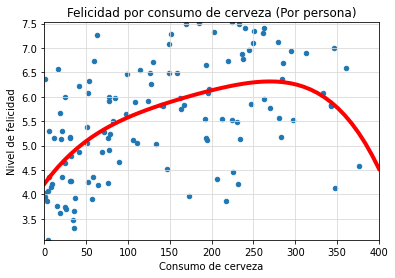

In [178]:
plt.scatter(x_beer, y_happiness, s=20)

# Títulos del gráfico (Cerveza)
# --------------------------------------------------------------
plt.title("Felicidad por consumo de cerveza (Por persona)")
plt.xlabel("Consumo de cerveza")
plt.ylabel("Nivel de felicidad")

# Otras opciones gráficas (Cerveza)
# --------------------------------------------------------------
plt.grid(True, linestyle='-', color='0.85')
plt.autoscale(tight=True)

# Calculos de polinomos de grado 1 a 5
# --------------------------------------------------------------

f4p, residuals, rank, sv, rcond = np.polyfit(x_beer, y_happiness, 4, full=True)
f4 = np.poly1d(f4p)
fx = np.linspace(0, 400)
plt.plot(fx, f4(fx), linewidth=4, color="red")
print("Error después de generar la recta de grado %i:" % f4.order,
      error(f4, x_beer, y_happiness), '\n')

Error después de generar la recta de grado 3: 127.25292760630127 



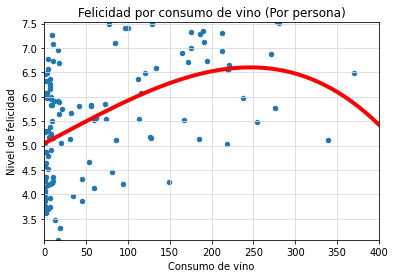

In [181]:
plt.scatter(x_wine, y_happiness, s=20)

# Títulos del gráfico (Vino)
# --------------------------------------------------------------
plt.title("Felicidad por consumo de vino (Por persona)")
plt.xlabel("Consumo de vino")
plt.ylabel("Nivel de felicidad")

# Otras opciones gráficas (Vino)
# --------------------------------------------------------------
plt.grid(True, linestyle='-', color='0.85')
plt.autoscale(tight=True)

# Calculos de polinomos de grado 1 a 5
# --------------------------------------------------------------

f3p, residuals, rank, sv, rcond = np.polyfit(x_wine, y_happiness, 3, full=True)
f3 = np.poly1d(f3p)
fx = np.linspace(0, 400)
plt.plot(fx, f3(fx), linewidth=4, color="red")
print("Error después de generar la recta de grado %i:" % f3.order,
      error(f1, x_wine, y_happiness), '\n')